In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import ast

In [2]:
charging_set = pd.read_csv("data/charging_sessions.csv")

In [21]:
# get overview of data
print("columns:")
print(charging_set.columns)
print("-------------------------------------------------------------------------")
print("info():")
print(charging_set.info())
print("-------------------------------------------------------------------------")
print("describe():")
print(charging_set.describe())

columns:
Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')
-------------------------------------------------------------------------
info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone    

In [22]:
charging_set.head(12)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 14:00:13+00:00,2020-01-02 23:00:41+00:00,2020-01-02 20:13:21+00:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil..."
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 14:09:14+00:00,2020-01-03 01:57:58+00:00,2020-01-03 00:59:21+00:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi..."
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 14:17:32+00:00,2020-01-03 00:44:54+00:00,2020-01-02 20:22:40+00:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil..."
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 14:25:38+00:00,2020-01-02 19:36:05+00:00,2020-01-02 18:38:39+00:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 14:27:40+00:00,2020-01-02 20:01:48+00:00,2020-01-02 19:17:46+00:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."


# TODO

- check validity and meaning of data (userInput)
- remove irrelevant columns
- split userInput in own columns
- check for duplicates
- check for None-values (userID)
- split userID into binary dummy (isRegistered)
- check for None-values for isRegistered = 1 (remove None-values for registered users)
- check data types of columns
- look at columns with multiple data types (remove wrong entries)
- check ranges of columns & unique values

# Data Cleanup

## Step 1: check validity of columns

- remove unnecessary "unnamed" column

After the first look on the dataset the first column "Unnamed 0" stands out. This column shadows the index and has no value for us. Therefore we remove this column first.

In [3]:
# remove irrelevant columns
charging_set.drop('Unnamed: 0', axis=1, inplace=True)
charging_set.head(3)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."


The second column that instantly stands out is the column "userInputs". This column does not only store one information but a list of different data. Before we can check for duplicates and None-values we have to separate the information stored in "userInputs" and store them in separate columns.

In [4]:
# split userInputs into own columns
def parse_user_inputs(row):
    try:
        # Parse the row as a Python object (e.g., list of dicts)
        parsed = ast.literal_eval(row) if pd.notnull(row) else []
        return parsed[0] if isinstance(parsed, list) and len(parsed) > 0 else {}
    except (ValueError, SyntaxError):
        return {}

# Parse 'userInputs' column in charging_set
charging_set['userInputs'] = charging_set['userInputs'].apply(parse_user_inputs)

# Specify the desired features to extract
desired_features = [
    'WhPerMile', 'kWhRequested', 'milesRequested',
    'minutesAvailable', 'modifiedAt', 'paymentRequired',
    'requestedDeparture'
]

# Extract desired features and create new columns
for feature in desired_features:
    charging_set[feature] = charging_set['userInputs'].apply(
        lambda x: x.get(feature) if isinstance(x, dict) else None
    )
charging_set = charging_set.drop(columns=['userInputs'])
charging_set

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,250.0,25.00,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,280.0,70.00,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,400.0,8.00,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,400.0,8.00,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,400.0,16.00,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,240.0,31.20,130.0,355.0,"Wed, 31 Jul 2019 18:08:23 GMT",True,"Thu, 01 Aug 2019 00:03:04 GMT"
66446,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,333.0,6.66,20.0,455.0,"Wed, 31 Jul 2019 18:41:02 GMT",True,"Thu, 01 Aug 2019 02:15:41 GMT"
66447,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,333.0,19.98,60.0,184.0,"Wed, 31 Jul 2019 19:04:57 GMT",True,"Wed, 31 Jul 2019 22:08:40 GMT"
66448,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,275.0,22.00,80.0,60.0,"Wed, 31 Jul 2019 19:20:10 GMT",True,"Wed, 31 Jul 2019 20:19:47 GMT"


In [5]:
# check for duplicates
duplicate_counter = charging_set.duplicated().sum()
print("sum of duplicates:", duplicate_counter)
charging_set.drop_duplicates(inplace=True)
(charging_set.head(5))

sum of duplicates: 1413


,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,250.0,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,280.0,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,400.0,8.0,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,400.0,8.0,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,400.0,16.0,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"


In [6]:
# check for none-values
nan_counts = charging_set.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)

for column, count in nan_counts_sorted.items():
    print(f"Feature: {column}, Count of NaN-Values: {count}")

Feature: paymentRequired, Count of NaN-Values: 17215
Feature: requestedDeparture, Count of NaN-Values: 17215
Feature: milesRequested, Count of NaN-Values: 17215
Feature: kWhRequested, Count of NaN-Values: 17215
Feature: modifiedAt, Count of NaN-Values: 17215
Feature: minutesAvailable, Count of NaN-Values: 17215
Feature: WhPerMile, Count of NaN-Values: 17215
Feature: userID, Count of NaN-Values: 17215
Feature: doneChargingTime, Count of NaN-Values: 4087
Feature: id, Count of NaN-Values: 0
Feature: connectionTime, Count of NaN-Values: 0
Feature: timezone, Count of NaN-Values: 0
Feature: spaceID, Count of NaN-Values: 0
Feature: stationID, Count of NaN-Values: 0
Feature: sessionID, Count of NaN-Values: 0
Feature: kWhDelivered, Count of NaN-Values: 0
Feature: disconnectTime, Count of NaN-Values: 0
Feature: siteID, Count of NaN-Values: 0


We observe a large number of NaN-values in the columns that were separated from the column \"userInputs\". It is very noticeable that the number of NaN-values of the \"userInputs\"-columns is the same as the number of the NaN-values in the \"userID\"-column. Accordingly, we assume that the NaN-values in the \"userInputs\"-columns originate from users not being registered. In the following, we check if our assumption is correct:

In [7]:
# list of userInputs columns
user_inputs = ["requestedDeparture", "milesRequested", "paymentRequired", "modifiedAt", "minutesAvailable", "WhPerMile", "kWhRequested"]

def check_user_inputs_nan_condition(user_inputs_columns):
    """
    check_user_inputs_nan_condition checks if userID is NaN when userInputs columns are NaN.
    
    :param user_inputs_columns: list of user input columns that were stored in the former "userInputs"-column
    :return: True if no violations are found, False if a userID exists with NaN in the corresponding userInput column.
    """
    # iterate over each row and compare userID-value to userInputs-values
    for idx, row in charging_set.iterrows():
        user_id_value = row["userID"]

        for user_input_column in user_inputs_columns:
            user_input_value = row[user_input_column]

            # if userID is not NaN but the userInputs-column is NaN, return false
            if (pd.isna(user_input_value) and not pd.isna(user_id_value)) or (not pd.isna(user_input_value) and pd.isna(user_id_value)):
                return False

    # if no violation of condition is found, return true
    return True

# check if unregistered users are the reason for NaN-values in userInputs columns
print("Unregistered users are the reason for NaN-values in userInputs columns:", check_user_inputs_nan_condition(user_inputs))

Unregistered users are the reason for NaN-values in userInputs columns: True


Now that we have identified the reason for the NaN values in the userInputs column as being unregistered users, it implies that these NaN values carry meaningful information. Therefore, we cannot simply remove the rows, as doing so would discard valuable data about the unregistered users. We replace the NaN-values with the number -1. To do so, we first check if we can use the number as a placeholder. It is important to note, that we only deal with non-time-data, since we will treat time-data differently.

In [8]:
# check if we can use -1 as a placeholder for NaN values for "userID" and userInputs columns, except for the time data since we want to treat them differently
columns_contain_nan = ["userID", "milesRequested", "paymentRequired", "minutesAvailable", "WhPerMile", "kWhRequested"]

contains_zero_value = (charging_set[columns_contain_nan] == -1).any()

print("user-data column contains a -1 value:\n", contains_zero_value)

user-data column contains a -1 value:
 userID              False
milesRequested      False
paymentRequired     False
minutesAvailable    False
WhPerMile           False
kWhRequested        False
dtype: bool


In [9]:
# fill NaN values with -1 in columns that do not contain zero values, for the rest of the columns, use -1
charging_set[columns_contain_nan] = charging_set[columns_contain_nan].fillna(-1)

Additionally, we create a new column called isRegistered, since the exact ID of a user is not relevant, but only the information wether a user is registered or not.

In [10]:
# isRegistered should be 0 if a user is not registered (userID == NaN) and be 1 if a user is registered
charging_set['isRegistered'] = (charging_set['userID'] != -1).astype(int)

As we saw earlier, there are still 4087 missing values in the column "doneChargingTime".

In [11]:
doneChargingTime_missing_values = charging_set["doneChargingTime"].isna().sum()
doneChargingTime_values = charging_set["doneChargingTime"].count()
print(f"Relative share of missing values in the column 'doneChargingTime': {(doneChargingTime_missing_values/doneChargingTime_values)*100:.2f}%")

Relative share of missing values in the column 'doneChargingTime': 6.71%


Since the relative share of missing values in the 'doneChargingTime' column is only 6.56% compared to the total number of values in that column, we decided to remove the NaN values from the dataset.

In [12]:
# remove Na-values based on the column "doneChargingTime"
charging_set = charging_set.dropna(subset=["doneChargingTime"])

# Time-Data

Now we have a look at the time data. Just as we filled the NaN-values for the userInputs with -1 as placeholders, we will use the minimum possible value for python's "datetime" datatype (01.01.0001, midnight UTC) as an equivalent to the 0 value we used for the other numeric columns. After, we will convert the time-data into human-readable format.

In [13]:
# convert time-data in correct datatype
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'])
charging_set['disconnectTime'] = pd.to_datetime(charging_set['disconnectTime'])
charging_set['doneChargingTime'] = pd.to_datetime(charging_set['doneChargingTime'])
charging_set['modifiedAt'] = pd.to_datetime(charging_set['modifiedAt'])
charging_set['requestedDeparture'] = pd.to_datetime(charging_set['requestedDeparture'])

charging_set['connectionTime_year'] = charging_set['connectionTime'].dt.year
charging_set['connectionTime_month'] = charging_set['connectionTime'].dt.month
charging_set['connectionTime_day'] = charging_set['connectionTime'].dt.day
charging_set['connectionTime_time'] = charging_set['connectionTime'].dt.time
charging_set['connectionTime_weekday'] = charging_set['connectionTime'].dt.weekday

charging_set['disconnectTime_year'] = charging_set['disconnectTime'].dt.year
charging_set['disconnectTime_month'] = charging_set['disconnectTime'].dt.month
charging_set['disconnectTime_day'] = charging_set['disconnectTime'].dt.day
charging_set['disconnectTime_time'] = charging_set['disconnectTime'].dt.time
charging_set['disconnectTime_weekday'] = charging_set['disconnectTime'].dt.weekday

charging_set['doneChargingTime_year'] = charging_set['doneChargingTime'].dt.year
charging_set['doneChargingTime_month'] = charging_set['doneChargingTime'].dt.month
charging_set['doneChargingTime_day'] = charging_set['doneChargingTime'].dt.day
charging_set['doneChargingTime_time'] = charging_set['doneChargingTime'].dt.time
charging_set['doneChargingTime_weekday'] = charging_set['doneChargingTime'].dt.weekday

charging_set['modifiedAt_year'] = charging_set['modifiedAt'].dt.year
charging_set['modifiedAt_month'] = charging_set['modifiedAt'].dt.month
charging_set['modifiedAt_day'] = charging_set['modifiedAt'].dt.day
charging_set['modifiedAt_time'] = charging_set['modifiedAt'].dt.time
charging_set['modifiedAt_weekday'] = charging_set['modifiedAt'].dt.weekday

charging_set['requestedDeparture_year'] = charging_set['requestedDeparture'].dt.year
charging_set['requestedDeparture_month'] = charging_set['requestedDeparture'].dt.month
charging_set['requestedDeparture_day'] = charging_set['requestedDeparture'].dt.day
charging_set['requestedDeparture_time'] = charging_set['requestedDeparture'].dt.time
charging_set['requestedDeparture_weekday'] = charging_set['requestedDeparture'].dt.weekday

In [14]:
# calculate the time a car is connected to the charging hub
charging_set["connectionDuration"] = (charging_set["disconnectTime"] - charging_set["connectionTime"]).dt.total_seconds()/3600
charging_set["chargingDuration"] = (charging_set["doneChargingTime"] - charging_set["connectionTime"]).dt.total_seconds()/3600

In [15]:
# check all columns for unwanted data types
all_columns = charging_set.columns

# store unique types in dictionary
column_types = {col: charging_set[col].apply(type).unique() for col in all_columns}

for col, types in column_types.items():
    print(f"{col}_types: {types}")

id_types: [<class 'str'>]
connectionTime_types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
disconnectTime_types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
doneChargingTime_types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
kWhDelivered_types: [<class 'float'>]
sessionID_types: [<class 'str'>]
siteID_types: [<class 'int'>]
spaceID_types: [<class 'str'>]
stationID_types: [<class 'str'>]
timezone_types: [<class 'str'>]
userID_types: [<class 'float'>]
WhPerMile_types: [<class 'float'>]
kWhRequested_types: [<class 'float'>]
milesRequested_types: [<class 'float'>]
minutesAvailable_types: [<class 'float'>]
modifiedAt_types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]
paymentRequired_types: [<class 'bool'> <class 'int'>]
requestedDeparture_types: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]
isRegistered_types: [<class 'int'>]
connectionTime_year_types: [<

In [16]:
# Check ranges of numeric columns
numeric_columns = charging_set.select_dtypes(include=[np.number])
for col in numeric_columns.columns:
    valid_values = numeric_columns.loc[numeric_columns[col] != -1, col]  # exclude -1, since we used it as a placeholder for NaN-values
    print(f"Column '{col}': min={valid_values.min()}, max={valid_values.max()}")

# Check unique values of categorical columns
categorical_columns = charging_set.select_dtypes(exclude=[np.number])
for col in categorical_columns.columns:
    print(f"Column '{col}': unique values={categorical_columns[col].unique()}")

Column 'kWhDelivered': min=0.501, max=108.79724166666666
Column 'siteID': min=1, max=2
Column 'userID': min=1.0, max=19923.0
Column 'WhPerMile': min=50.0, max=2000.0
Column 'kWhRequested': min=0.0, max=215.32
Column 'milesRequested': min=0.0, max=480.0
Column 'minutesAvailable': min=1.0, max=10062.0
Column 'isRegistered': min=0, max=1
Column 'connectionTime_year': min=2018, max=2021
Column 'connectionTime_month': min=1, max=12
Column 'connectionTime_day': min=1, max=31
Column 'connectionTime_weekday': min=0, max=6
Column 'disconnectTime_year': min=2018, max=2021
Column 'disconnectTime_month': min=1, max=12
Column 'disconnectTime_day': min=1, max=31
Column 'disconnectTime_weekday': min=0, max=6
Column 'doneChargingTime_year': min=2018, max=2021
Column 'doneChargingTime_month': min=1, max=12
Column 'doneChargingTime_day': min=1, max=31
Column 'doneChargingTime_weekday': min=0, max=6
Column 'modifiedAt_year': min=2018.0, max=2021.0
Column 'modifiedAt_month': min=1.0, max=12.0
Column 'modi

The timezone column only has one value: "". Hence, we can remove it since it does not bring any new information to the analysis.

In [17]:
charging_set.drop('timezone', axis=1, inplace=True)
charging_set.head(3)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,modifiedAt_day,modifiedAt_time,modifiedAt_weekday,requestedDeparture_year,requestedDeparture_month,requestedDeparture_day,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,...,2.0,13:09:39,3.0,2020.0,1.0,2.0,20:51:54,3.0,6.039167,4.378056
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,...,2.0,13:37:11,3.0,2020.0,1.0,2.0,23:31:50,3.0,9.025278,6.687500
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,...,2.0,13:57:17,3.0,2020.0,1.0,2.0,14:56:35,3.0,10.713056,2.641944


# Outliers

We identify multiple columns with outliers: 
- (kWhDelivered: min approx. 2 km range)
- WhPerMile: energy consumption of 2000 too high 
- minutesAvailable: 10.000 minutes = almost 7 days
- connectionDuration: min. 0.05h = 3 min
- chargingDuration: min. -0.68h, max = 200h

Let's have a look at the features that seem to have extreme outliers:

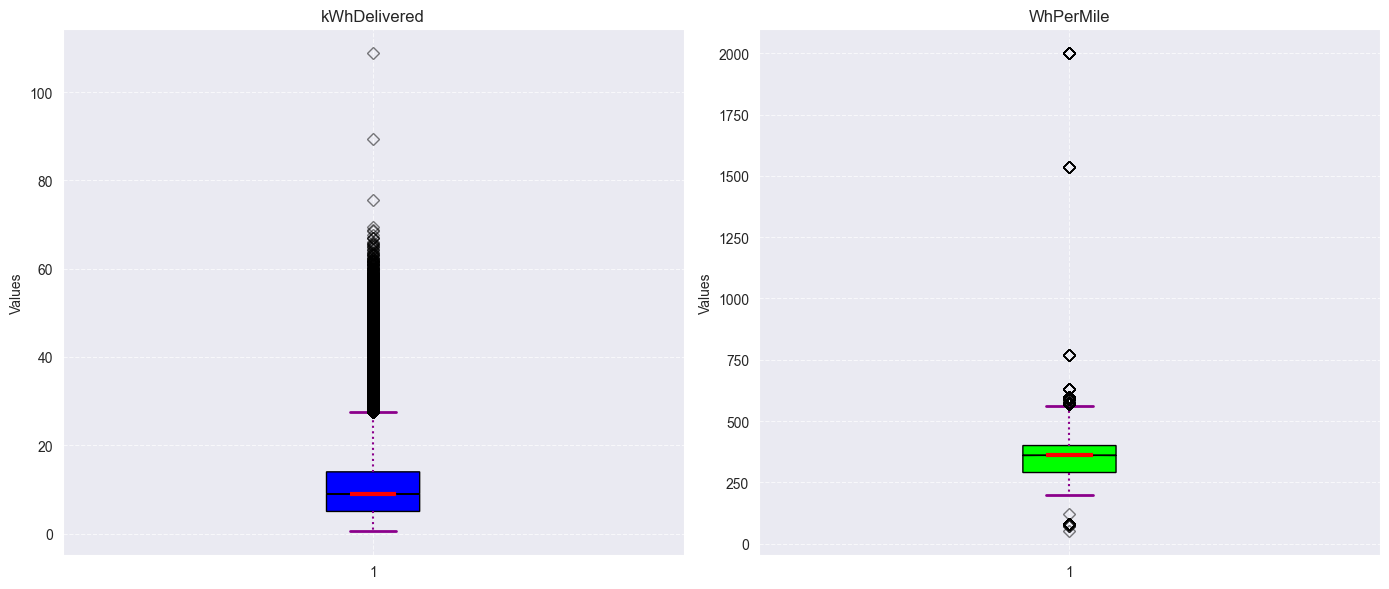

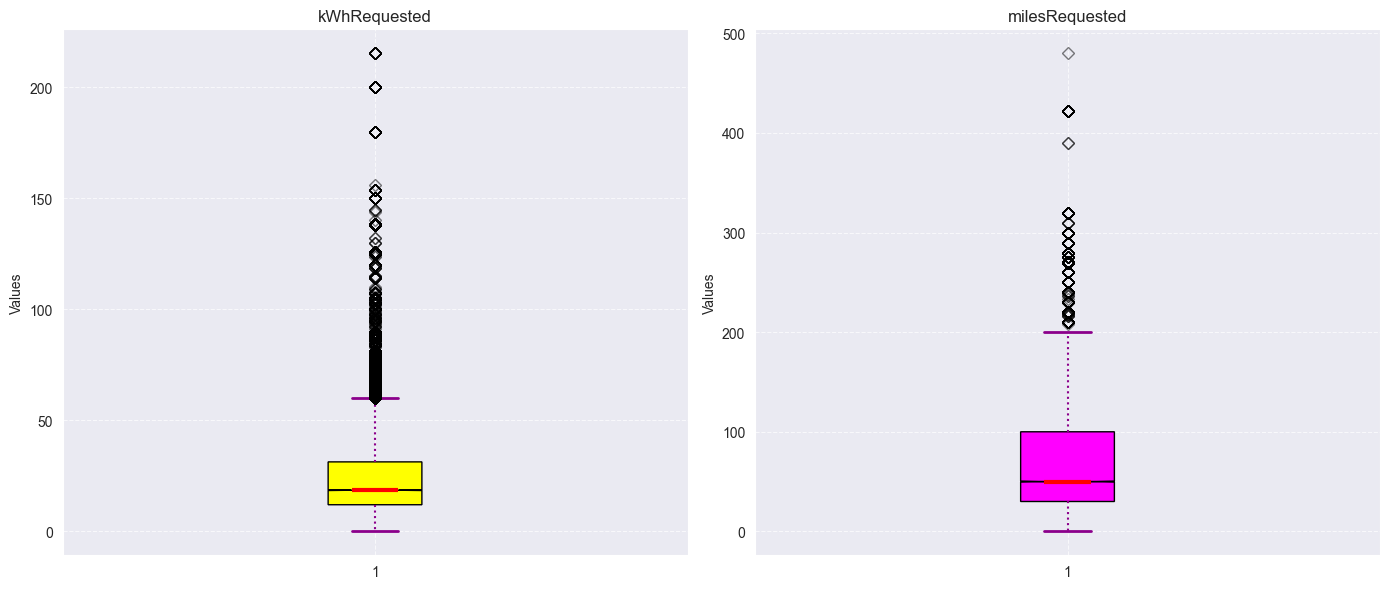

In [18]:
# visualize numerical data with boxplot to check for outliers
kWhDelivered_data = list(filter(lambda x: x != -1, charging_set["kWhDelivered"]))
WhPerMile_data = list(filter(lambda x: x != -1, charging_set["WhPerMile"]))
kWhRequested_data = list(filter(lambda x: x != -1, charging_set["kWhRequested"]))
milesRequested_data = list(filter(lambda x: x != -1, charging_set["milesRequested"]))
# minutesAvailable_data = list(filter(lambda x: x != -1, charging_set["minutesAvailable"]))

focused_features = [kWhDelivered_data, WhPerMile_data, kWhRequested_data, milesRequested_data]
focused_features_labels = ['kWhDelivered', 'WhPerMile', 'kWhRequested', 'milesRequested']
colors = ['#0000FF', '#00FF00', '#FFFF00', '#FF00FF', '#FF4500']

# Create subplots with 2 boxplots displayed side by side
for i in range(0, len(focused_features), 2):  # Process two datasets at a time
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Iterate over the current pair of datasets
    for j, (ax, data_list, label, color) in enumerate(zip(axes, focused_features[i:i+2], focused_features_labels[i:i+2], colors[i:i+2])):
        # Creating boxplot
        bp = ax.boxplot(data_list, patch_artist=True, notch=True, vert=True)

        # Customizing boxplot
        for patch in bp['boxes']:
            patch.set_facecolor(color)

        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        for cap in bp['caps']:
            cap.set(color='#8B008B', linewidth=2)

        for median in bp['medians']:
            median.set(color='red', linewidth=3)

        for flier in bp['fliers']:
            flier.set(marker='D', color='#e7298a', alpha=0.5)

        # Adding labels and title
        ax.set_title(f"{label}")
        ax.set_ylabel('Values')
        ax.grid(True, linestyle='--', alpha=0.7)

    # Hide the second subplot if there is no fifth dataset
    if len(focused_features[i:i+2]) < 2:
        axes[1].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

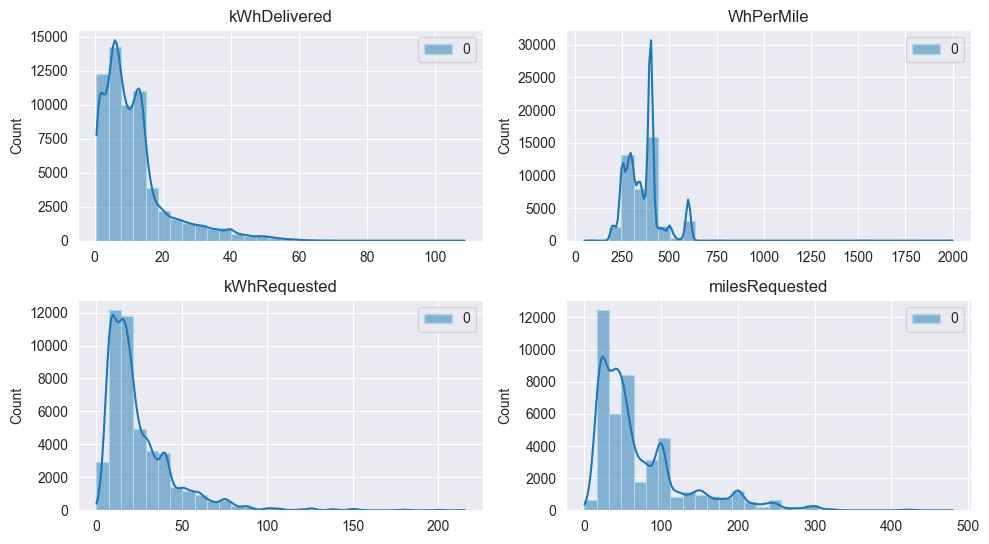

In [19]:
# "data" (from previous cell) = [kWhDelivered_data, WhPerMile_data, kWhRequested_data, milesRequested_data, minutesAvailable_data]
# titles = [f"{feature_name}" for feature_name in focused_features]

# Create a figure for the plots
plt.figure(figsize=(10, 8))

# Plot histograms for each data list using the desired style
for i, data in enumerate(focused_features, 1):
    ax = plt.subplot(3, 2, i)  # 3 rows, 2 columns, position i
    sns.histplot([data], bins=30, kde=True, color='blue', edgecolor='lightblue', ax=ax)  # Custom style for histplot
    ax.set_title(focused_features_labels[i-1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# Remove outliers
We can see that the focused features do not follow a normal distribution but show more similarities with that of an exponential function. Therefore, we cannot identify outliers using the z-scores. However, we set thresholds manually.

After further research, the average electric vehicle (EV) has an energy consumption of 304 Wh/mile (189 Wh/km). The minimum energy consumption is estimated at 220 Wh/mile and the maximum energy consumption is estimated at 749 Wh/mile. For the driving range, our research results in these specifications: the current average range is 283 miles per full charge, while the minimum range for a full charge is estimated at 149 miles and the maximum range for one full charge is at 520 miles.

There are multiple other factors that affect the performance of a car like the weather, vehicle design and driving conditions. The numbers from our research are often provided by the car manufacturers, which stem from tests under optimal conditions. We set the thresholds with margin for unexpected influence of other/unknown factors (driving conditions, personal driving style etc.).

Consequently, we set the minimum threshold for outliers for the feature "WhPerMile" to 200 Wh/mile and the maximum threshold to 750 Wh/mile.
The minimum threshold for the milesRequested is set to 0 miles (depends on state of charge of the car the the time it plugs into the charging hub) and the maximum threshold to 550 miles.

We will now remove the outliers for the features "WhPerMile" and "milesRequested" and then see how the other focused features behave.


In [21]:
# remove outlier in minutesAvailable of 2000 min
# charging_set = charging_set[(charging_set['minutesAvailable'] < max_ts_WhPerMile) & (charging_set['WhPerMile'] > min_ts_WhPerMile)]


# "data" (from previous cell) = [kWhDelivered_data, , kWhRequested_data, , minutesAvailable_data]
# define thresholds
min_ts_WhPerMile = 200
max_ts_WhPerMile = 750

min_ts_milesRequested = 0
max_ts_milesRequested = 550

min_ts_minutesAvailable = 0
max_ts_minutesAvailable = 1500

# count number of records that we would remove from dataset
count_WhPerMile = (((charging_set['WhPerMile'] > max_ts_WhPerMile) | (charging_set['WhPerMile'] < min_ts_WhPerMile)) & (charging_set['WhPerMile'] >= 0)).sum()
print("numer of outliers in 'WhPerMile'", count_WhPerMile)
print(f"share of outliers in data set: {count_WhPerMile / len(charging_set)*100:.2f}%")

# minutesAvailable

count_minutesAvailable = (((charging_set['minutesAvailable'] > max_ts_minutesAvailable) | (charging_set['minutesAvailable'] < min_ts_minutesAvailable)) & (charging_set['minutesAvailable'] >= 0)).sum()
print("numer of outliers in 'minutesAvailable'", count_minutesAvailable)
print(f"share of outliers in data set: {count_minutesAvailable / len(charging_set)*100:.2f}%")

numer of outliers in 'WhPerMile' 67
share of outliers in data set: 0.11%
numer of outliers in 'minutesAvailable' 4
share of outliers in data set: 0.01%


In [22]:
# remove outliers in WhPerMile
charging_set = charging_set[(charging_set['WhPerMile'] < max_ts_WhPerMile) & (charging_set['WhPerMile'] > min_ts_WhPerMile)]
charging_set = charging_set[(charging_set['minutesAvailable'] < max_ts_WhPerMile) & (charging_set['minutesAvailable'] > min_ts_WhPerMile)]

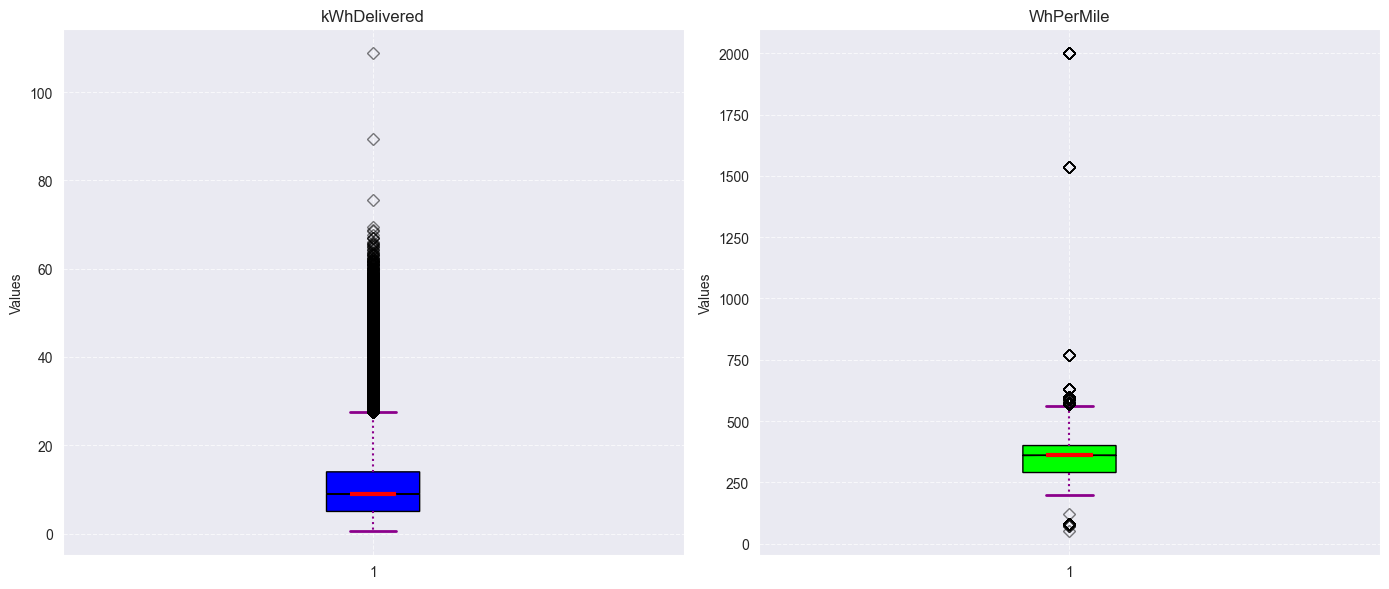

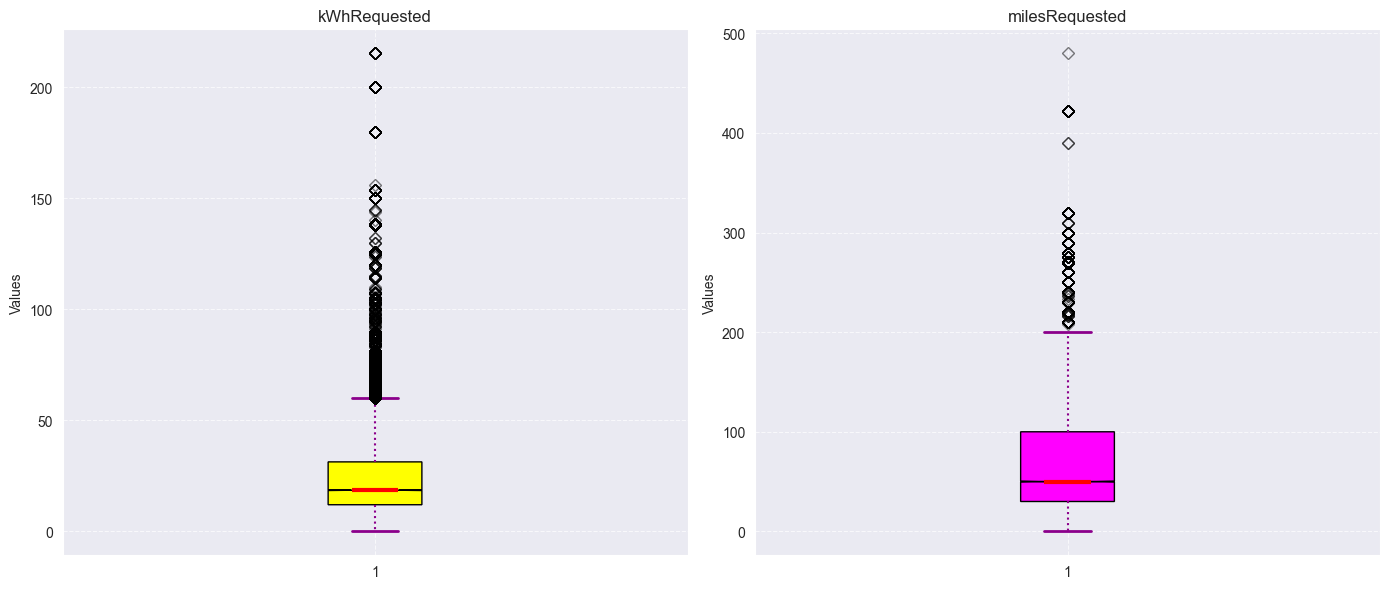

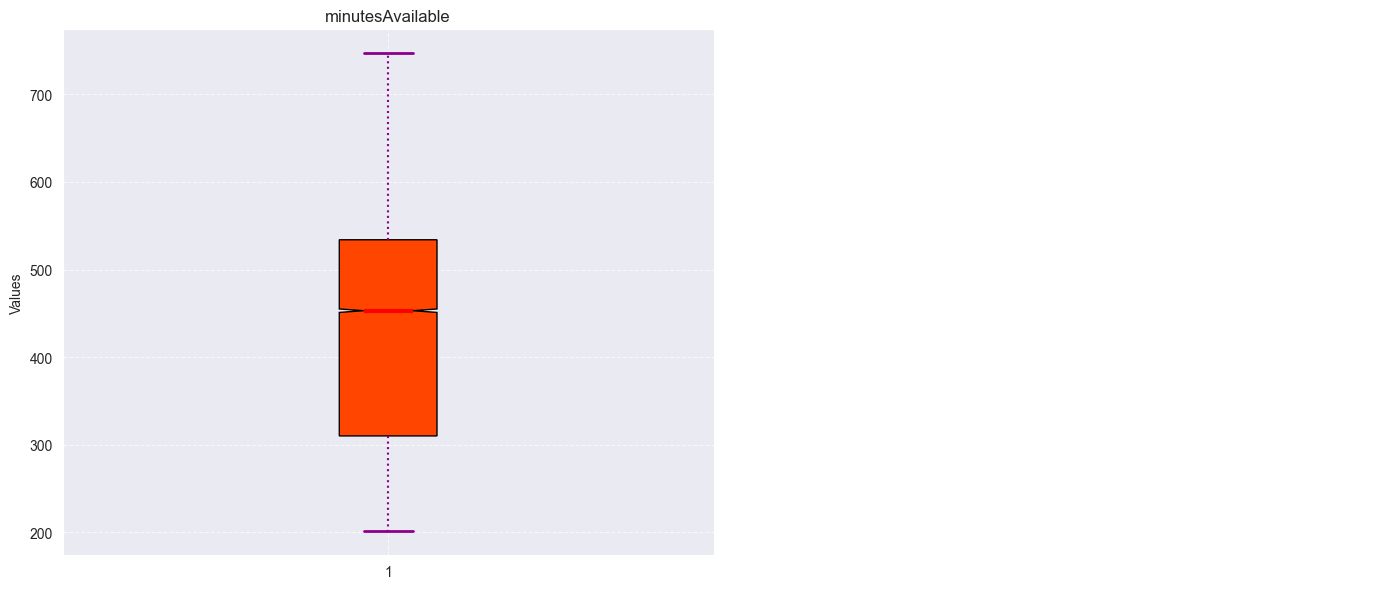

In [23]:
focused_features_labels += ["minutesAvailable"]
focused_features += [charging_set['minutesAvailable']]


# Create subplots with 2 boxplots displayed side by side
for i in range(0, len(focused_features), 2):  # Process two datasets at a time
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Iterate over the current pair of datasets
    for j, (ax, data_list, label, color) in enumerate(zip(axes, focused_features[i:i+2], focused_features_labels[i:i+2], colors[i:i+2])):
        # Creating boxplot
        bp = ax.boxplot(data_list, patch_artist=True, notch=True, vert=True)

        # Customizing boxplot
        for patch in bp['boxes']:
            patch.set_facecolor(color)

        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B', linewidth=1.5, linestyle=":")

        for cap in bp['caps']:
            cap.set(color='#8B008B', linewidth=2)

        for median in bp['medians']:
            median.set(color='red', linewidth=3)

        for flier in bp['fliers']:
            flier.set(marker='D', color='#e7298a', alpha=0.5)

        # Adding labels and title
        ax.set_title(f"{label}")
        ax.set_ylabel('Values')
        ax.grid(True, linestyle='--', alpha=0.7)

    # Hide the second subplot if there is no fifth dataset
    if len(focused_features[i:i+2]) < 2:
        axes[1].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

As we can see, removing the outliers

### Charging Feature Engineering

In [24]:
charging_set['connect_weekday'] = pd.to_datetime(charging_set["connectionTime"]).dt.weekday
charging_set['disconnect_weekday'] = pd.to_datetime(charging_set["disconnectTime"]).dt.weekday

In [25]:
charging_set['chargingDone_disconnect_difference'] = (pd.to_datetime(charging_set["disconnectTime"]) - pd.to_datetime(charging_set["doneChargingTime"])).dt.total_seconds() / 3600

In [26]:
charging_set.to_csv('data/cleaned_charging_set.csv', index=False)

Calculate hourly space utilization

In [48]:
# Step 1: Ensure that both connectionTime, disconnectTime, and timestamp are in UTC (if needed)
charging_set['connectionTime'] = pd.to_datetime(charging_set['connectionTime'], utc=True)
charging_set['disconnectTime'] = pd.to_datetime(charging_set['disconnectTime'], utc=True)

# hourly_utilization_site_1['timestamp'] = pd.to_datetime(hourly_utilization_site_1['timestamp'], utc=True)
timestamp = pd.date_range(start='2018-01-01', end='2021-12-31', freq='H')
timestamp = timestamp.tz_localize('UTC')

df = pd.DataFrame(timestamp, columns=['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S+00:00')

# Step 2: Filter charging sessions for siteID == 0
site_0_sessions = charging_set[charging_set['siteID'] == 0]


def count_spaces_taken(timestamp, site_0_sessions):
    # count how many sessions overlap with this timestamp
    next_timestamp = timestamp + pd.Timedelta(hours=1)
    overlap_count = site_0_sessions[
        ((site_0_sessions['connectionTime'] >= timestamp) & (site_0_sessions['connectionTime'] < next_timestamp)) |
        ((site_0_sessions['disconnectTime'] > timestamp) & (site_0_sessions['disconnectTime'] <= next_timestamp)) |
        ((site_0_sessions['connectionTime'] <= timestamp) & (site_0_sessions['disconnectTime'] > timestamp))
        ].shape[0]
    return overlap_count

# utilization
hourly_utilization_site_1 = pd.DataFrame(timestamp, columns=['timestamp'])

hourly_utilization_site_1['space_utilization'] = hourly_utilization_site_1['timestamp'].apply(lambda x: count_spaces_taken(x, charging_set))

KeyboardInterrupt: 

In [86]:
hourly_utilization_site_1[hourly_utilization_site_1["space_utilization"] > 0]

,timestamp,space_utilization
2871,2018-04-30 15:00:00+00:00,1
2872,2018-04-30 16:00:00+00:00,1
2873,2018-04-30 17:00:00+00:00,1
2874,2018-04-30 18:00:00+00:00,1
2875,2018-04-30 19:00:00+00:00,1
...,...,...
32458,2021-09-14 10:00:00+00:00,1
32459,2021-09-14 11:00:00+00:00,1
32460,2021-09-14 12:00:00+00:00,1
32461,2021-09-14 13:00:00+00:00,1


In [87]:
hourly_utilization_site_1.to_csv('data/hourly_utilization_site_1.csv', index=False)

In [89]:
charging_set["connectionTime_date"] = pd.to_datetime(
    charging_set["disconnectTime_year"].astype(str) + "-" +
    charging_set["connectionTime_month"].astype(str) + "-" +
    charging_set["connectionTime_day"].astype(str)
)

In [90]:
# Lockdown-Spalte: 1, wenn der Zeitraum zwischen 20. März 2020 und 30. Juni 2020 ist
charging_set["Lockdown"] = charging_set["connectionTime_date"].apply(
    lambda date: 1 if pd.Timestamp("2020-03-20") <= date <= pd.Timestamp("2020-06-30") else 0
)

In [91]:
# Covid-Spalte: 1, wenn das Datum nach dem 21. Januar 2020 liegt
charging_set["Covid"] = charging_set["connectionTime_date"].apply(
    lambda date: 1 if date > pd.Timestamp("2020-01-21") else 0
)

In [93]:
charging_set

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,userID,...,requestedDeparture_time,requestedDeparture_weekday,connectionDuration,chargingDuration,connect_weekday,disconnect_weekday,chargingDone_disconnect_difference,connectionTime_date,Lockdown,Covid
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,194.0,...,20:51:54,3.0,6.039167,4.378056,3,3,1.661111,2020-01-02,0,0
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,4275.0,...,23:31:50,3.0,9.025278,6.687500,3,3,2.337778,2020-01-02,0,0
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,344.0,...,14:56:35,3.0,10.713056,2.641944,3,4,8.071111,2020-01-02,0,0
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,1117.0,...,15:04:58,3.0,2.644722,1.313056,3,3,1.331667,2020-01-02,0,0
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,334.0,...,22:24:01,3.0,8.144167,4.291389,3,3,3.852778,2020-01-02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66443,5d574ad2f9af8b4c10c03650,2019-07-31 14:50:02+00:00,2019-07-31 23:19:49+00:00,2019-07-31 17:11:26+00:00,9.083,1_1_191_786_2019-07-31 14:50:01.704944,1,AG-4F36,1-1-191-786,607.0,...,23:43:02,2.0,8.496389,2.356667,2,2,6.139722,2019-07-31,0,0
66445,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,393.0,...,00:03:04,3.0,5.353889,5.370556,2,2,-0.016667,2019-07-31,0,0
66446,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,220.0,...,02:15:41,3.0,6.316944,3.061667,2,3,3.255278,2019-07-31,0,0
66447,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,1974.0,...,22:08:40,2.0,3.661667,3.678056,2,2,-0.016389,2019-07-31,0,0


In [92]:
charging_set.to_csv('data/cleaned_charging_set.csv', index=False)